In [95]:
# Imports:

## Steady-State Analysis

---

Aim:

- Try to find a way to incorporate what we know about steady states into the system comparisons.

### Idea #1
Assume a simple queueing system $M/M/1$ with fixed parameters,
- $\lambda = 0.95$
- $\mu = 1$
- $\rho = {\mu \over \lambda} =  0.95$

Simulate this system for different maximum customer values, where $C_{max} = \{100; 1000; 10,000; 100,000; 1,000,000\}$.

For each simulation, when a new customer arrives log the number of customers in the system, $N$, for arrival time $t$. Furthermore, collect the waiting time of each customer.

Using the data, estimate the long-run time-average number of customers in the system, $\hat L$, and the long-run time average time spent in queue per customer, $\hat W_Q$.

Calculate the theoretical expectations of $L$ and $W_Q$.

Use statistical analysis to test for a difference between the estimates and expectations.

In [96]:
# Requirements:
import matplotlib.pyplot as plt
import numpy as np

from Queue import *

In [146]:
# Data generation:
MM1 = QueueSimulation(
    n_servers= 1,
    discipline= 'FIFO',
    mean_service_rate= 1,
    mean_arrival_rate= 0.95,
    max_customers= 200,
    max_runtime= 100,
    seed= None,
    B= 'M'
)

MM1.run()

In [147]:
# Data extraction:
t = MM1.t
N = MM1.N
mutations = MM1.mutations

print('N =', N[:5])
print('t =', t[:5])
print('mutations =', mutations[:5])

N = [1. 0. 1. 2. 3.]
t = [0.         0.2093143  0.74714897 0.81305141 1.28803908]
mutations = [ 1. -1.  1.  1.  1.]


N_steps = [1. 0. 0. 1. 1.]
t_steps = [0.         0.         0.2093143  0.2093143  0.74714897]


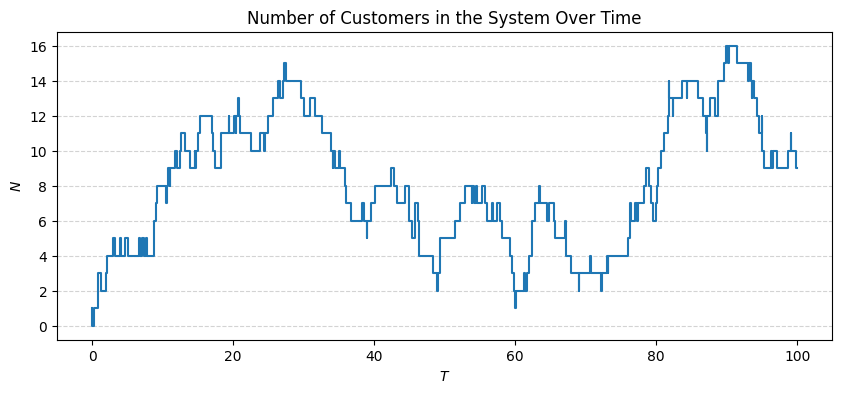

In [148]:
# Visualization:
N_steps = np.repeat(N, 2)[1:]
t_steps = np.repeat(t, 2)[:-1]

print('N_steps =', N_steps[:5])
print('t_steps =', t_steps[:5])

# Plotting
plt.figure(figsize=(10, 4))
plt.step(t_steps, N_steps, where='post')
plt.title('Number of Customers in the System Over Time')
plt.xlabel('$T$')
plt.ylabel('$N$')
plt.grid(axis='y', linestyle='--', alpha=1, color='lightgray')
plt.show()

In [118]:
# Calculations:
total_time_per_N = {}

for i in range(len(N) - 1):
    current_N = N[i]
    time_interval = t[i+1] - t[i]

    # If this N was used before, add its time interval to the total:
    if current_N in total_time_per_N:
        total_time_per_N[current_N] += time_interval
    
    # Else initiate it:
    else:
        total_time_per_N[current_N] = time_interval

# Check if the total time is equal to the last time point:
print('Total time: ', t[-1])
print('Sum of all N: ', sum(total_time_per_N.values()))

# Results:
total_time_per_N


Total time:  99999.89411443107
Sum of all N:  99999.89411443101


{1.0: 4091.739122866948,
 2.0: 3914.4827278156645,
 3.0: 3775.5551414527263,
 4.0: 3699.743411061351,
 5.0: 3495.9914787302537,
 6.0: 3338.3158073440927,
 7.0: 3139.9270187611546,
 8.0: 3009.403985421979,
 9.0: 2876.3850323290285,
 0.0: 4449.556299330202,
 10.0: 2771.857882307538,
 11.0: 2645.791436053459,
 12.0: 2553.353075013916,
 13.0: 2404.173090542743,
 14.0: 2267.9661671792246,
 15.0: 2143.5957716870303,
 16.0: 2134.6914085826243,
 17.0: 2140.5796929526305,
 18.0: 2046.937374217459,
 19.0: 1880.0847249128938,
 20.0: 1858.1910602414355,
 21.0: 1799.9706499787092,
 22.0: 1730.7638390059308,
 23.0: 1589.5222345378793,
 24.0: 1463.6366934502926,
 25.0: 1297.3961906014583,
 26.0: 1347.6490030269101,
 27.0: 1279.1085845432974,
 28.0: 1233.78367102069,
 29.0: 1164.366174369071,
 30.0: 1096.986814908927,
 31.0: 1048.7509793697702,
 32.0: 1017.6949526920913,
 33.0: 989.7224500260345,
 34.0: 943.3438312838628,
 35.0: 911.1502297513825,
 36.0: 874.4928136650875,
 37.0: 876.8891210500989,
 3

In [119]:
# Estimate the long-run time-average number of customers in the system (L):
L_est = sum([N * time for N, time in total_time_per_N.items()]) / t[-1]
print('L_est =', L_est)
L = 0.95 / (1 - 0.95)
print('L =', L)

L_est = 22.232097935639448
L = 18.999999999999982


In [120]:
# Estimate
W_est = MM1.system_times.mean()
print('W_est =', W_est)
W = L / 0.95
print('W =', W)

W_est = 23.359699408980045
W = 19.999999999999982


In [121]:
# Little's Law:  L = lambda * W
print('Estimated:', L_est, 0.95 * W_est)
print('Theoretical:', L, .95 * W)


Estimated: 22.232097935639448 22.191714438531044
Theoretical: 18.999999999999982 18.999999999999982


In [122]:
# Calculate average time spent in the queue (W_q):
W_q = W - 1
print('W_q =', W_q)
W_q_est = W_est - 1
print('W_q_est =', W_q_est)

# Versus measured:
W_q_measured = MM1.waiting_times.mean()
print('W_q_measured =', W_q_measured)

W_q = 18.999999999999982
W_q_est = 22.359699408980045
W_q_measured = 22.355341529016936


In [123]:
from Metrics import *

waiting_lists, queue_lengths = MM1.get_log()
avg_waiting_times = np.mean(waiting_lists)
avg_queue_lengths = np.mean(queue_lengths)

Metrics = QueueMetrics(MM1)


print("EXPECTED")
expected_metrics = Metrics.get_expected_metrics()
for key, value in expected_metrics.items():
    print(f"{key} = {value:.3f}")

print("\nMEASURED AVERAGE(S)")
print(f"Average queue length: {avg_queue_lengths:.3f} \nAverage wait time: {avg_waiting_times:.3f} ")

EXPECTED
p_0 = 0.050
delay probability = 0.950
expected queue length = 18.050
expected waiting time = 19.000

MEASURED AVERAGE(S)
Average queue length: 21.294 
Average wait time: 22.355 


Text(0, 0.5, 'Expected Wait Time')

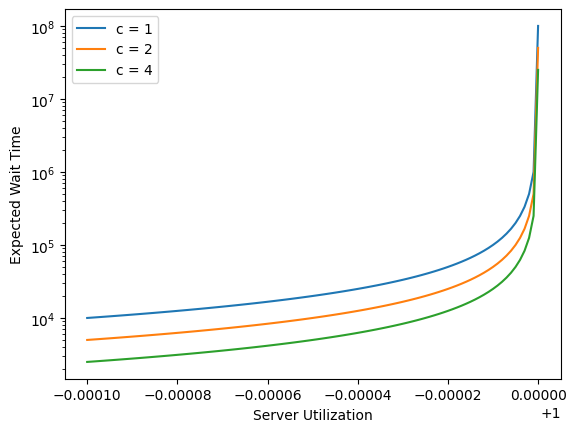

In [145]:
def calc_p0(rho, c, ):
    # probability customer visits an empty system
    
    if c == 1:
        return 1 - rho
    
    else:
        s = 0
        for k in range(c):
            # summation
            s += (c * rho)**k / math.factorial(k)
        
        # add last component
        s += (c * rho)**c / (math.factorial(c) * (1 - rho))
        p_0 = s**(-1)
        return p_0


def calc_delay_prob(rho, c, p_0):
    # probability customer will have to wait for service
    if c == 1:
        return rho
    else:
        p_c = p_0 * ((c * rho)**c / math.factorial(c))
        p_d = p_c / (1 - rho)
        return p_d

def calc_exp_length(rho, delay_prob):
    # Queue length using little's law - excludes service
    return delay_prob * (rho / (1 - rho))

def calc_exp_wait(c, rho, service_rate, delay_prob):
    # Queue wait time using little's law - excludes service
    return delay_prob / (c * service_rate * (1 - rho))

rhos = np.linspace(0.9999, 1, 101)
exp_waits = np.array([])

for c in [1, 2, 4]:
    for rho in rhos:
        if rho == 1:
            rho = 0.99999999
        p_0 = calc_p0(rho=rho, c=c)
        p_d = calc_delay_prob(rho=rho, c=c, p_0=p_0)
        exp_length = calc_exp_length(rho=rho, delay_prob=p_d)
        exp_wait = calc_exp_wait(c=c, rho=rho, service_rate=1, delay_prob=p_d)
        
        exp_waits = np.append(exp_waits, exp_wait)

    plt.plot(rhos, exp_waits)
    plt.yscale('log')

    exp_waits = np.array([])

plt.legend(['c = 1', 'c = 2', 'c = 4'])
plt.xlabel('Server Utilization')
plt.ylabel('Expected Wait Time')